<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/counts_coins_20_hough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OpenCV - Excercise #1

### By Joo Soo Jeong / Ph.D

### https://github.com/JSJeong-me/KOSA-Vision

### email: heinem@naver.com

###  Copyrights 2021

![coins-20.jpg](attachment:01553487-4112-46c7-9c11-378f328e26f5.jpg)

# Step 1 - Find red RGB codes

low [0, 0, 220]
high [255, 255, 255]

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Dj2f5UbImGbI24Mt5FQVWa2Zh8UtjEWi' -O coins-20.jpg

--2024-09-13 00:59:04--  https://docs.google.com/uc?export=download&id=1Dj2f5UbImGbI24Mt5FQVWa2Zh8UtjEWi
Resolving docs.google.com (docs.google.com)... 142.250.101.100, 142.250.101.102, 142.250.101.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Dj2f5UbImGbI24Mt5FQVWa2Zh8UtjEWi&export=download [following]
--2024-09-13 00:59:04--  https://drive.usercontent.google.com/download?id=1Dj2f5UbImGbI24Mt5FQVWa2Zh8UtjEWi&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137619 (134K) [image/jpeg]
Saving to: ‘coins-20.jpg’

coins-20.jpg        100%[===================>] 134.39K  --.-KB/s    in 0.04s   


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import sys

img = cv2.imread('./coins-20.jpg')

In [3]:
# 그레이 스케일 변환 ---①
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 노이즈 제거를 위한 가우시안 블러 ---②
blur = cv2.GaussianBlur(gray, (3,3), 0)

In [4]:
# 허프 원 변환 적용( dp=1.2, minDist=30, cany_max=200 ) ---③
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 60, None, 350)
print(circles.shape[1])

20


circle = cv2.HoughCircles(img, method, dp, minDist, circles, param1, param2, minRadius, maxRadius)

img: 입력 이미지, 1채널 배열
method: 검출 방식 선택 (현재 cv2.HOUGH_GRADIENT만 가능)
dp: 입력 영상과 경사 누적의 해상도 반비례율, 1: 입력과 동일, 값이 커질수록 부정확
minDist: 원들 중심 간의 최소 거리 (0: 에러, 0이면 동심원이 검출 불가하므로)
circles(optional): 검출 원 결과, N x 1 x 3 부동 소수점 배열 (x, y, 반지름)
param1(optional): 캐니 엣지에 전달할 스레시홀드 최대 값 (최소 값은 최대 값의 2배 작은 값을 전달)
param2(optional): 경사도 누적 경계 값 (값이 작을수록 잘못된 원 검출)
minRadius, maxRadius(optional): 원의 최소 반지름, 최대 반지름 (0이면 이미지 전체의 크기)

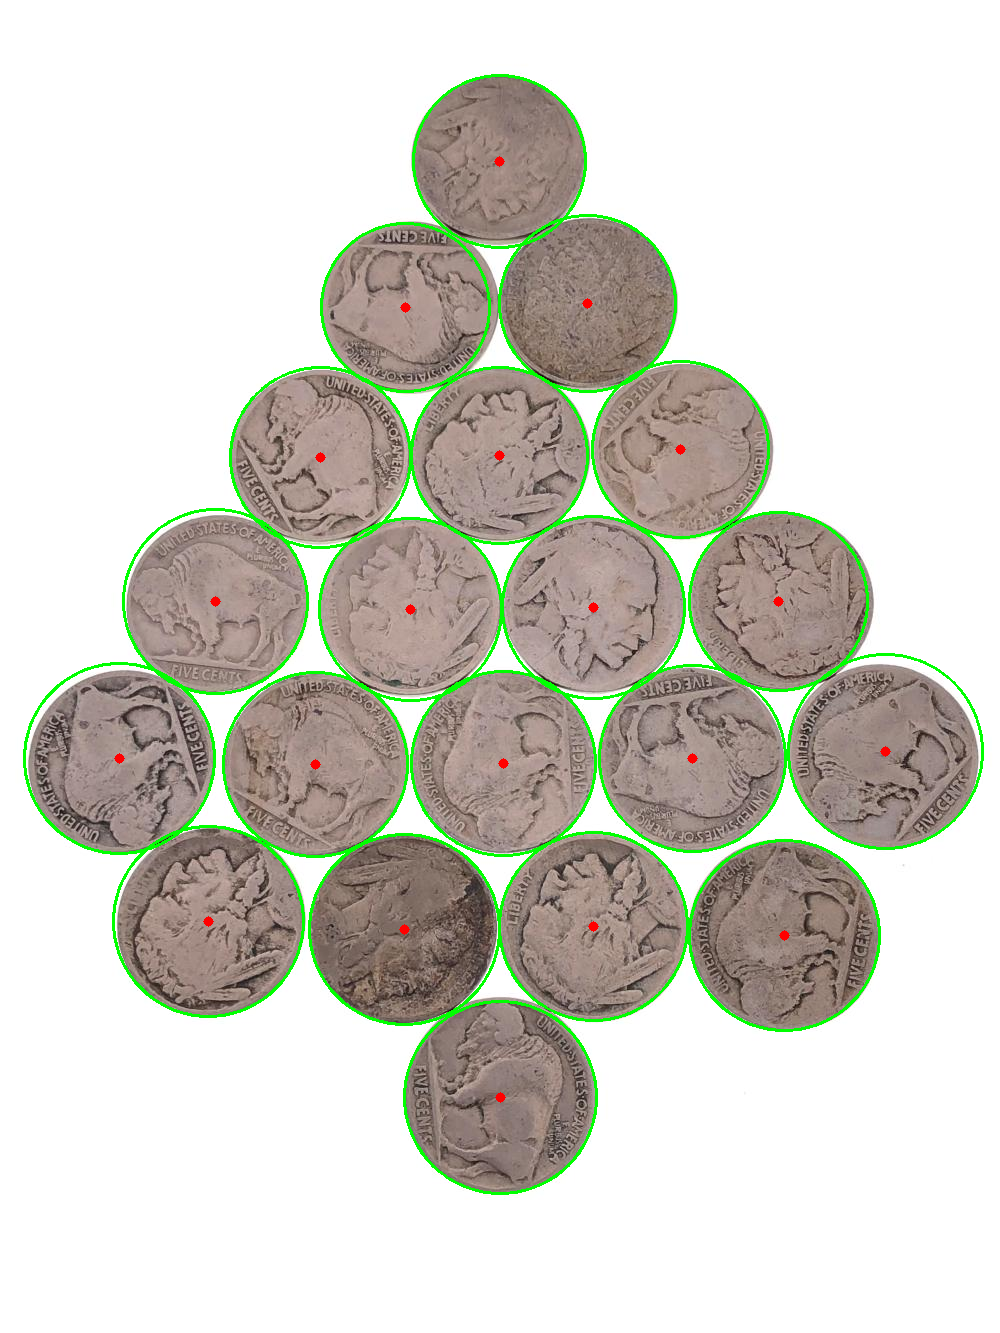

In [5]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # 원 둘레에 초록색 원 그리기
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 2)
        # 원 중심점에 빨강색 원 그리기
        cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 5)

# 결과 출력
cv2_imshow(img)
# cv2.imshow('hough circle', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Draw circles
for (i, c) in enumerate(cnts):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.drawContours(rgb_src, [c], -1, (0, 255, 0), 5)
    cv2.putText(rgb_src, "{}".format(i + 1), (int(x)-55, int(y)+50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)

In [6]:
# Step 1 - Find red RGB codes

#### low [111, 29, 18]
#### high [200, 50, 50]

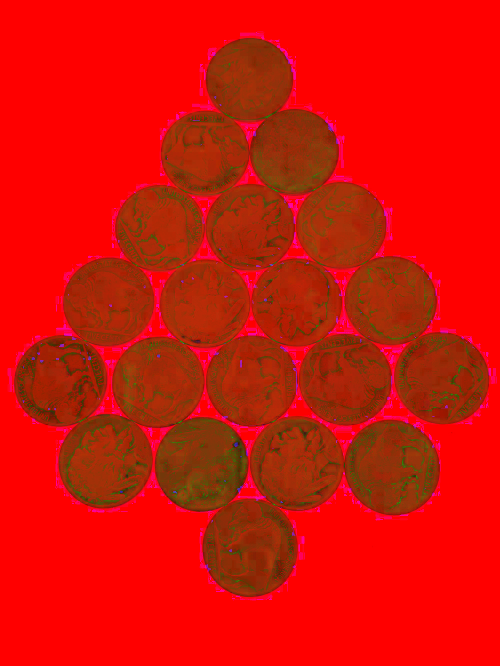

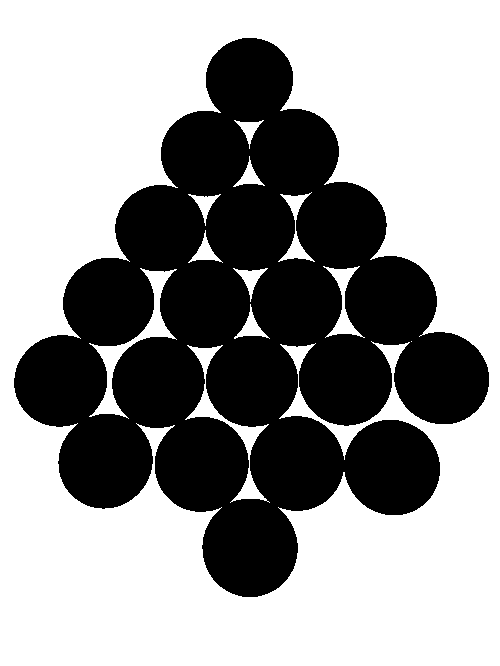

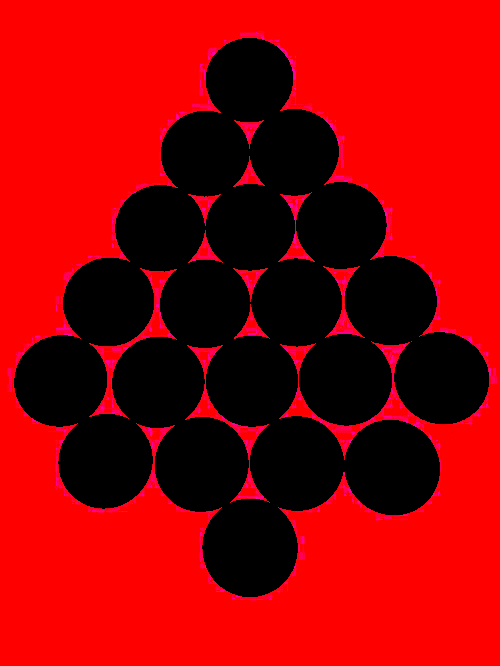

In [8]:
import cv2
import numpy as np
import sys

src = cv2.imread('./coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)
result = cv2.bitwise_and(hsv_src, hsv_src, mask=mask)


cv2_imshow(hsv_src)
cv2_imshow(mask)
cv2_imshow(result)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
#Step 2

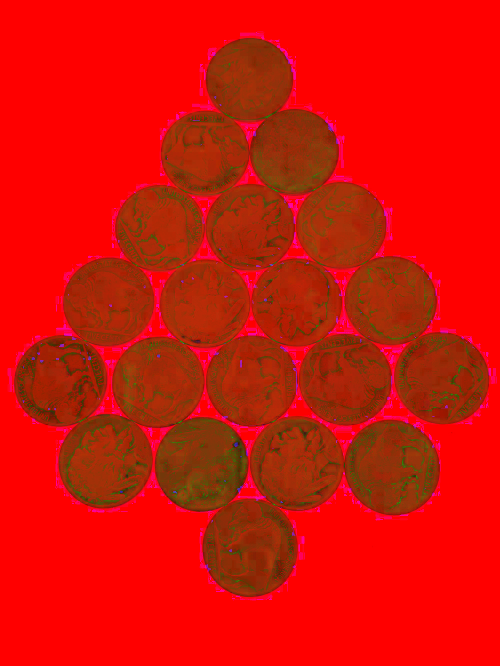

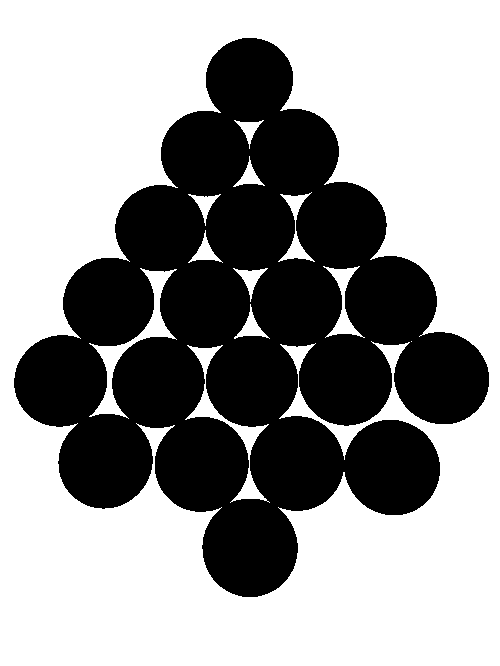

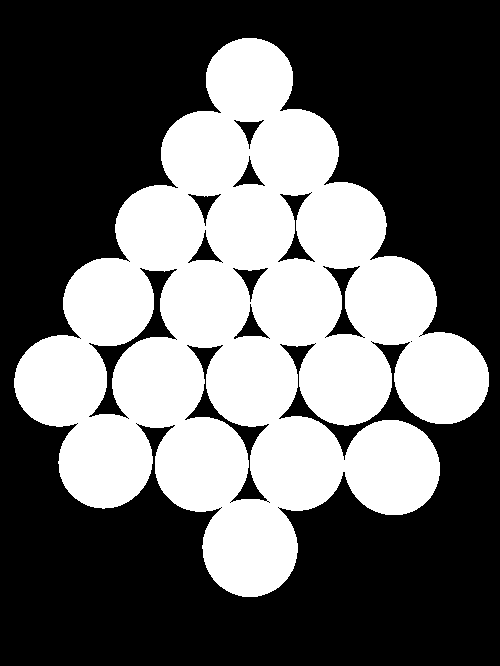

In [9]:
import cv2
import numpy as np
import sys

src = cv2.imread('./coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

#result = cv2.bitwise_and(src, src, mask=mask)


cv2_imshow(hsv_src)
cv2_imshow(mask)
cv2_imshow(image_thresh)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# Step 3 Blur

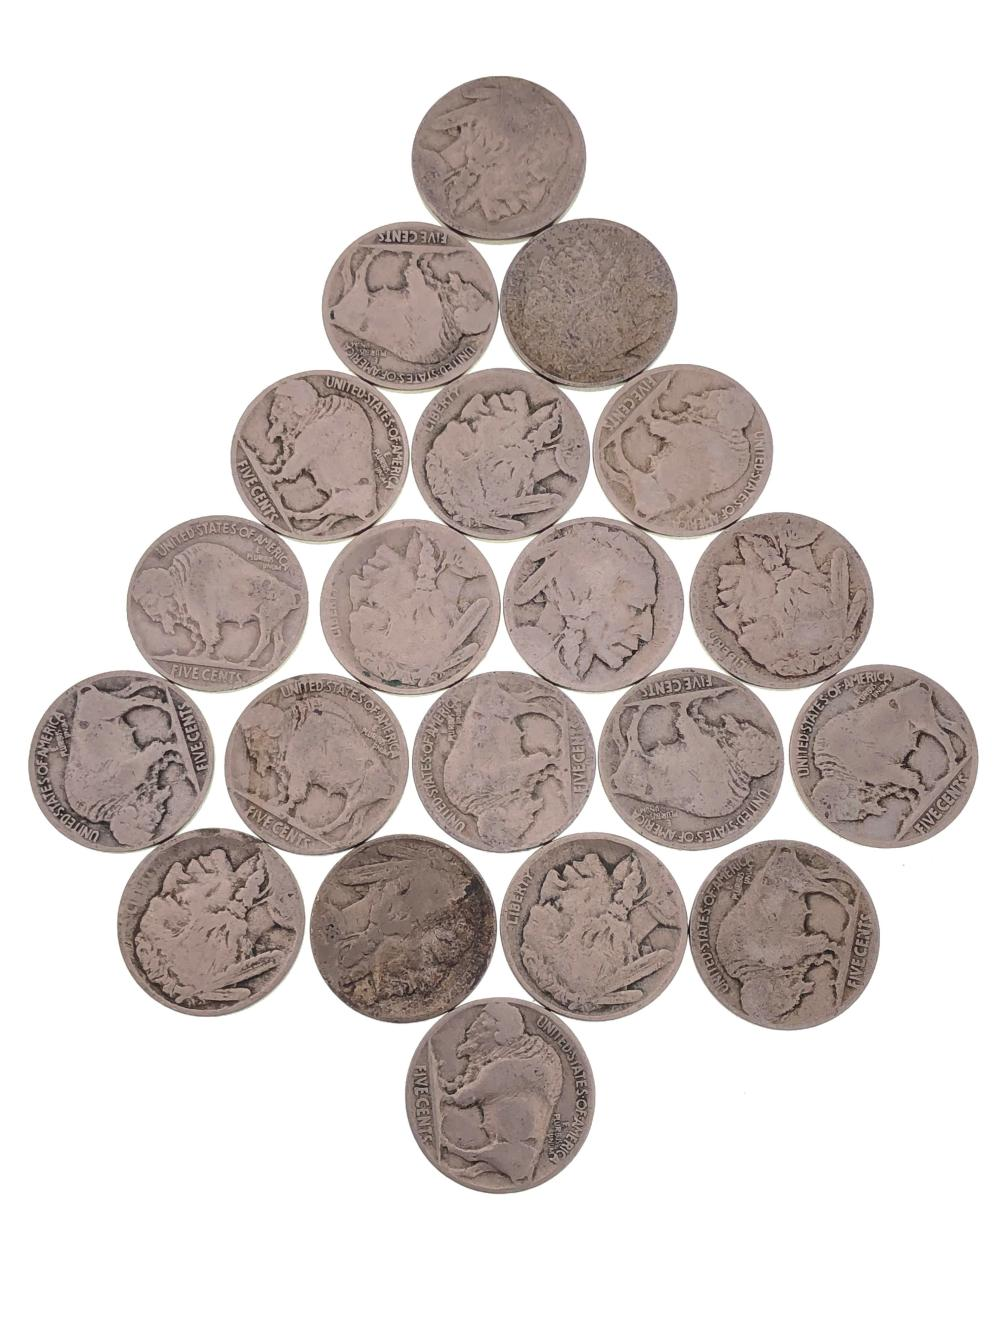

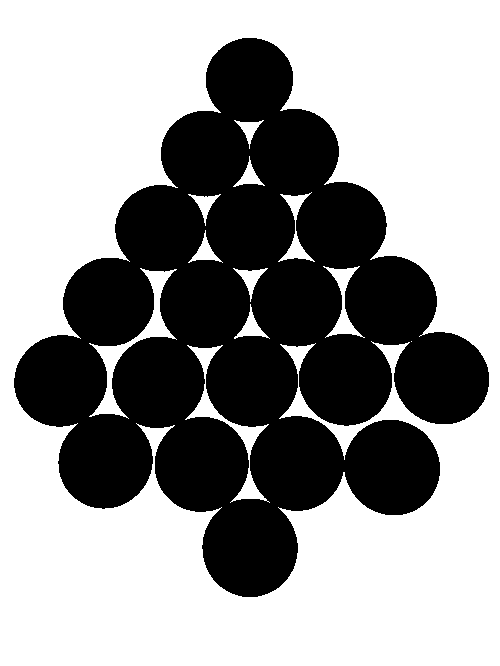

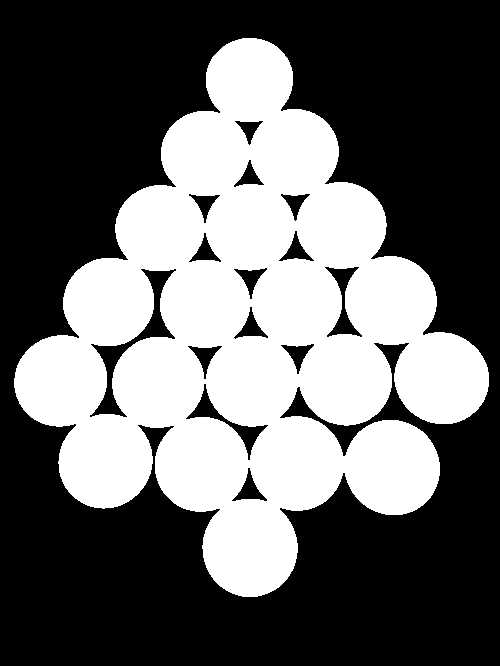

In [10]:
import cv2
import numpy as np
import sys

src = cv2.imread('./coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

#result = cv2.bitwise_and(src, src, mask=mask)


cv2_imshow(src)
cv2_imshow(mask)
cv2_imshow(blur)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# Step 4 noise deduction

In [ ]:
import cv2
import numpy as np
import sys

src = cv2.imread('./coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()

hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)


cv2_imshow(src)
cv2_imshow(blur)
cv2_imshow(shaved)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# Step 5 Distance transform

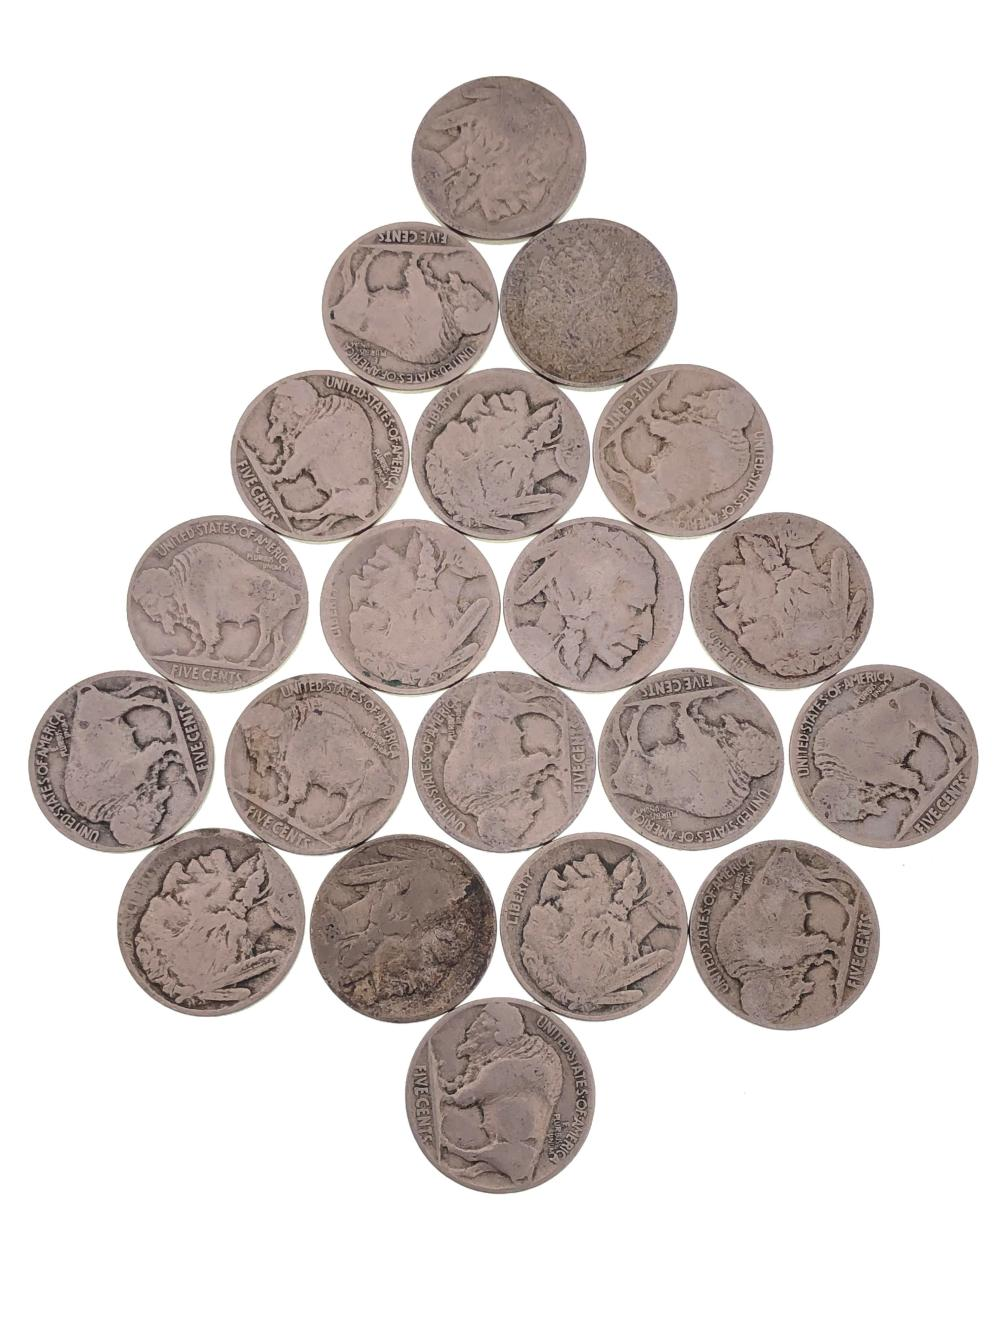

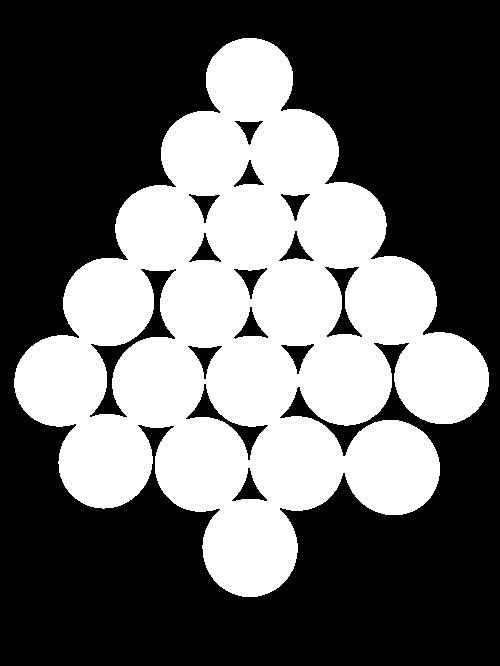

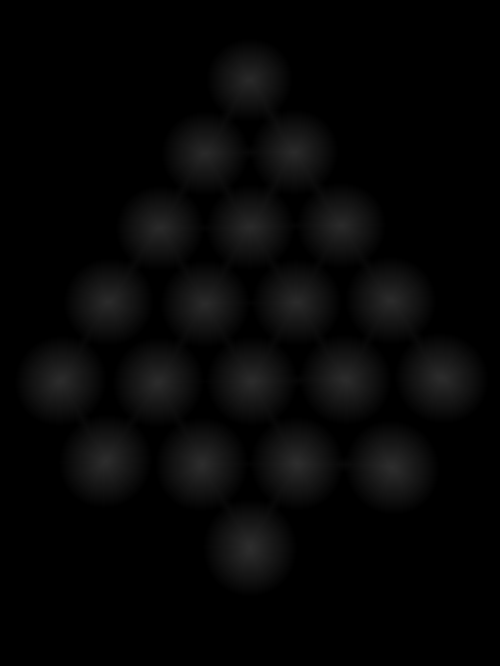

In [12]:
import cv2
import numpy as np
import sys

src = cv2.imread('./coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

# Distance transfrom
dist_transform = cv2.distanceTransform(shaved,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)

cv2_imshow(src)
cv2_imshow(shaved)
cv2_imshow(dist_transform)
# cv2-imshow(isolate_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
# Step 6 Contour & counts of number of caps

20


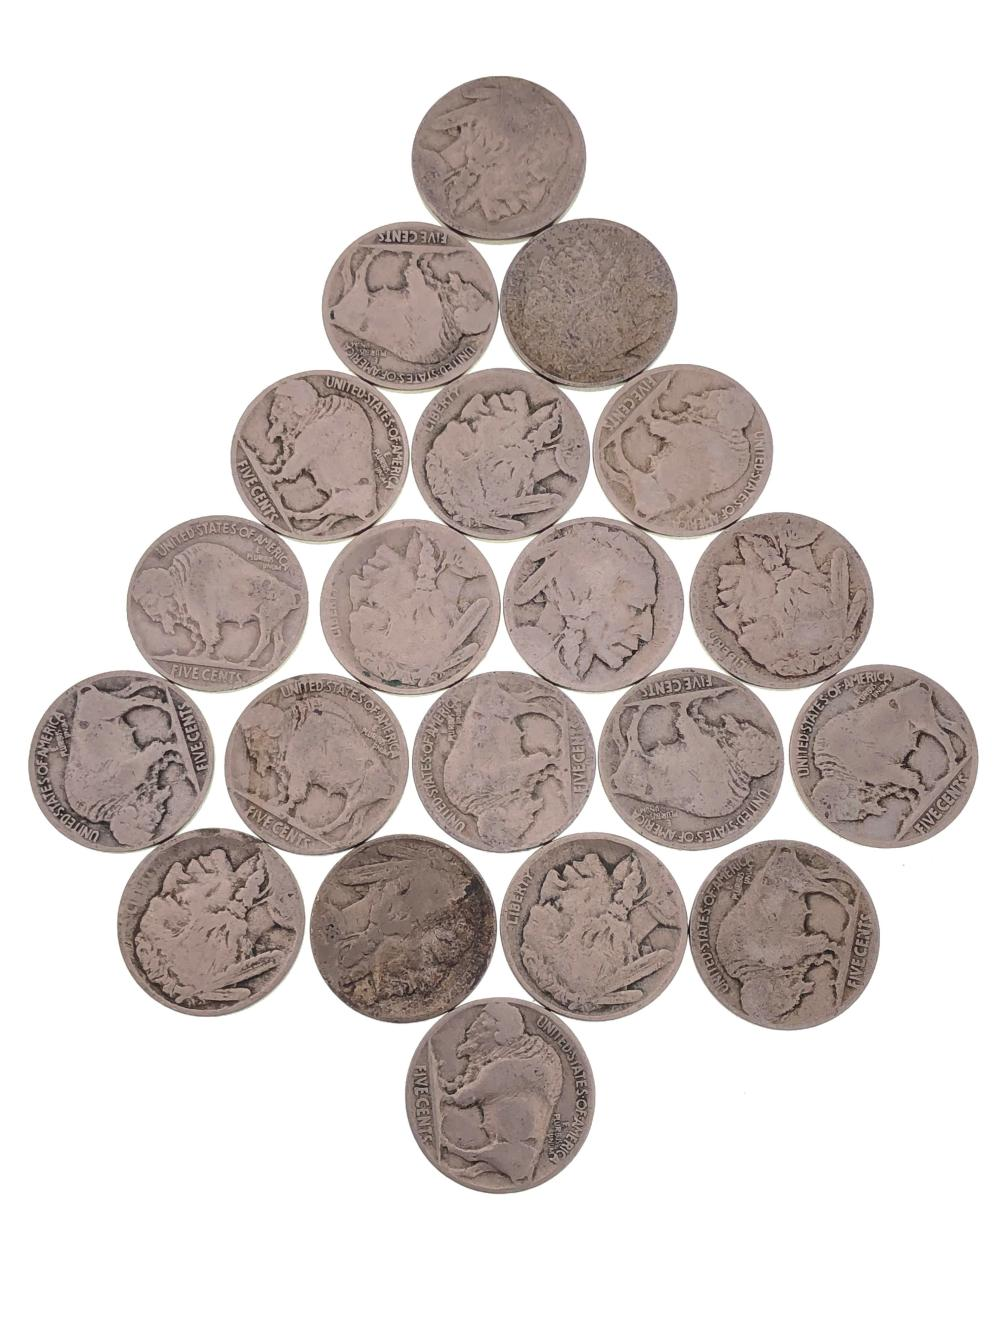

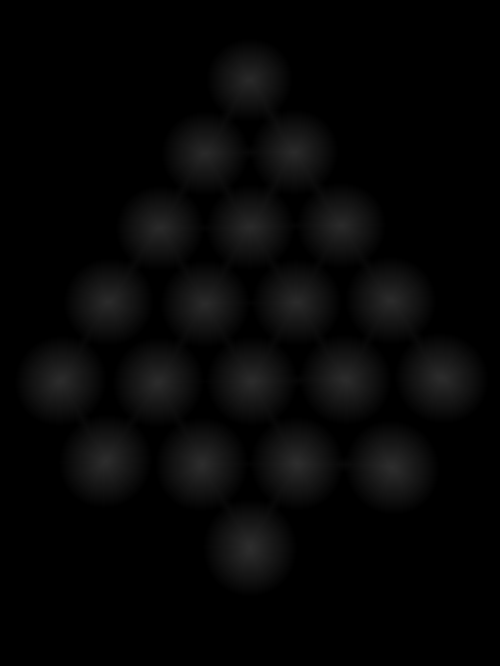

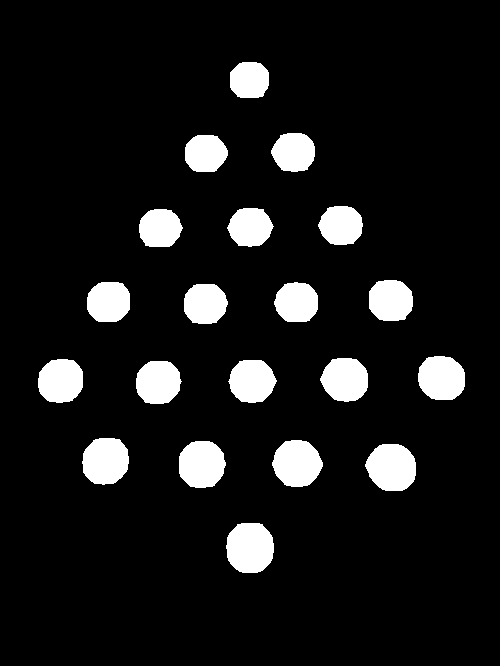

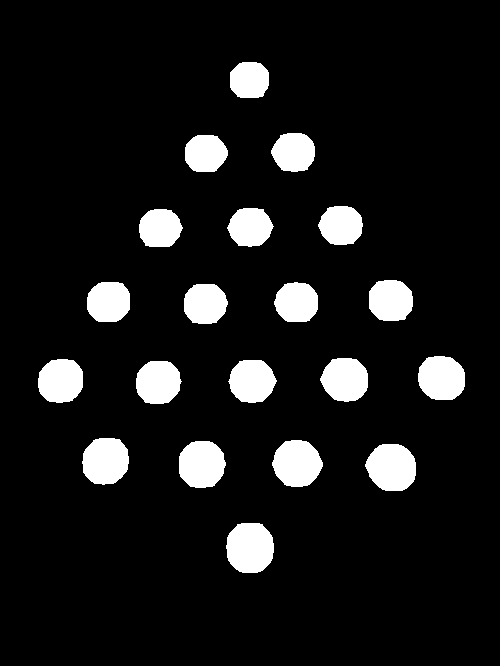

In [15]:
import cv2
import numpy as np
import sys
import imutils

src = cv2.imread('./coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

# Distance transfrom
dist_transform = cv2.distanceTransform(shaved,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)

# Contours
last_image = np.uint8(isolate_image)

# the counting of objects and recording the positions of the objects
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))


cv2_imshow(src)
cv2_imshow(dist_transform)
cv2_imshow(isolate_image)
cv2_imshow(last_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# Step 7 Draw circles

20


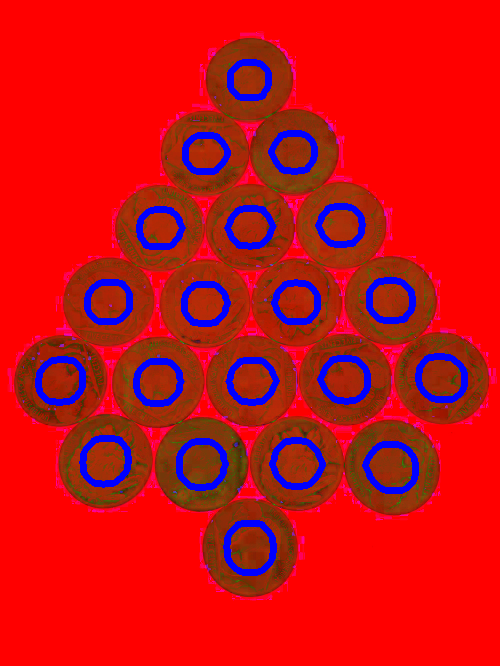

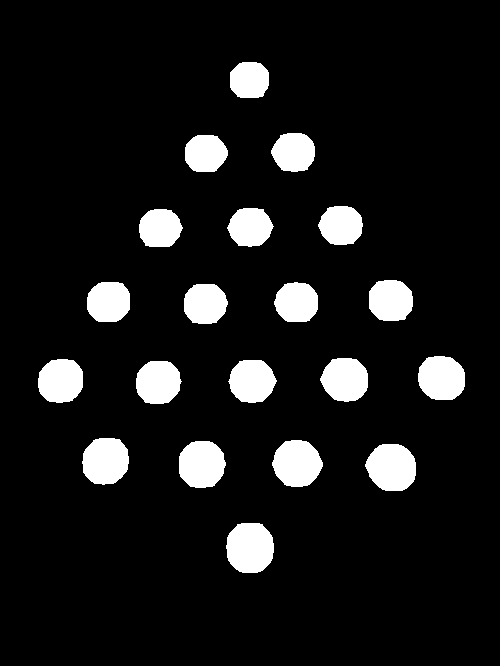

In [16]:
import cv2
import numpy as np
import sys
import imutils

src = cv2.imread('./coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

# Distance transfrom
dist_transform = cv2.distanceTransform(shaved,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)

# Contours
last_image = np.uint8(isolate_image)

# the counting of objects and recording the positions of the objects
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))

# Draw circles
for pts in cnts:
    perimeter = cv2.arcLength(pts, True)
    cv2.drawContours(hsv_src, [pts], 0, (255, 0, 0), 5)
    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True), True)


cv2_imshow(hsv_src)
cv2_imshow(last_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [18]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=11NPxArphDybU91qA-9O6toYPx0d5ZRzv' -O antivirus.jpg

--2024-09-13 01:08:09--  https://docs.google.com/uc?export=download&id=11NPxArphDybU91qA-9O6toYPx0d5ZRzv
Resolving docs.google.com (docs.google.com)... 142.250.101.102, 142.250.101.113, 142.250.101.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=11NPxArphDybU91qA-9O6toYPx0d5ZRzv&export=download [following]
--2024-09-13 01:08:09--  https://drive.usercontent.google.com/download?id=11NPxArphDybU91qA-9O6toYPx0d5ZRzv&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55562 (54K) [image/jpeg]
Saving to: ‘antivirus.jpg’

antivirus.jpg       100%[===================>]  54.26K  --.-KB/s    in 0.02s   



9


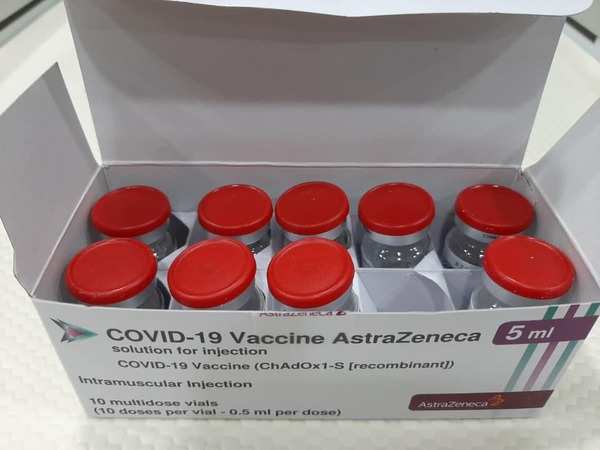

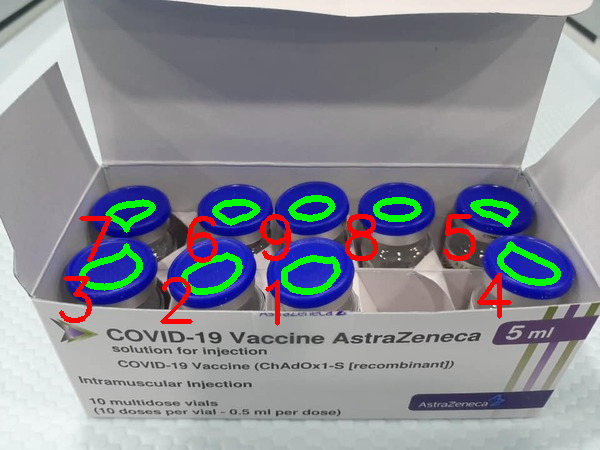

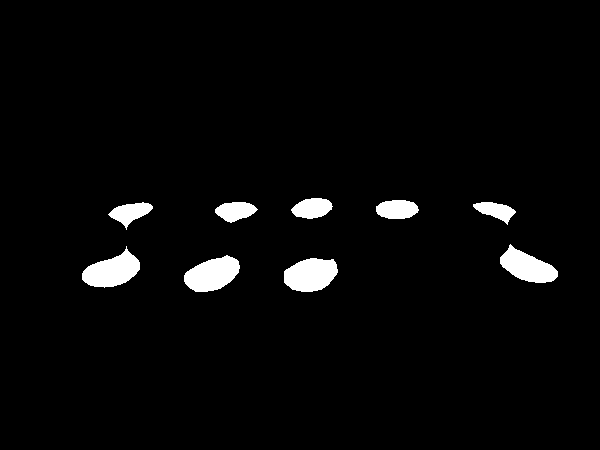

In [19]:
import cv2
import numpy as np
import sys
import imutils


src = cv2.imread('./antivirus.jpg')

if src is None:
    print('image load failed')
    sys.exit()

rgb_src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# Every color except white & Green
low = np.array([111, 0, 0])
high = np.array([204, 55, 55])
mask = cv2.inRange(rgb_src, low, high)

blur = cv2.medianBlur(mask,15) # 25 -> 17

#kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
#shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

# Distance transfrom
dist_transform = cv2.distanceTransform(blur,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)


# Contours
last_image = np.uint8(isolate_image)

# the counting of objects and recording the positions of the objects
cnts, _ = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cnts = imutils.grab_contours(cnts)
print(len(cnts))

# Draw circles
for (i, c) in enumerate(cnts):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.drawContours(rgb_src, [c], -1, (0, 255, 0), 5)
    cv2.putText(rgb_src, "{}".format(i + 1), (int(x)-55, int(y)+50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)


cv2_imshow(src)
cv2_imshow(rgb_src)
cv2_imshow(last_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()
